## Лабораторная работа 4

### Метод прогонки

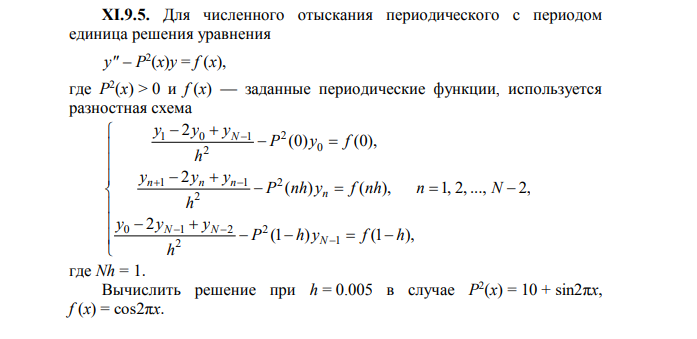

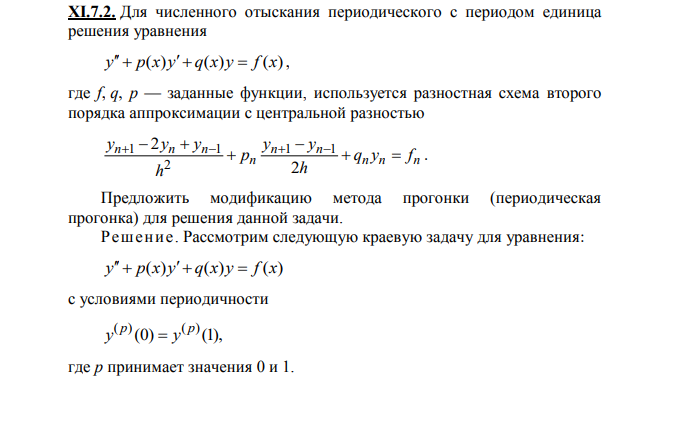

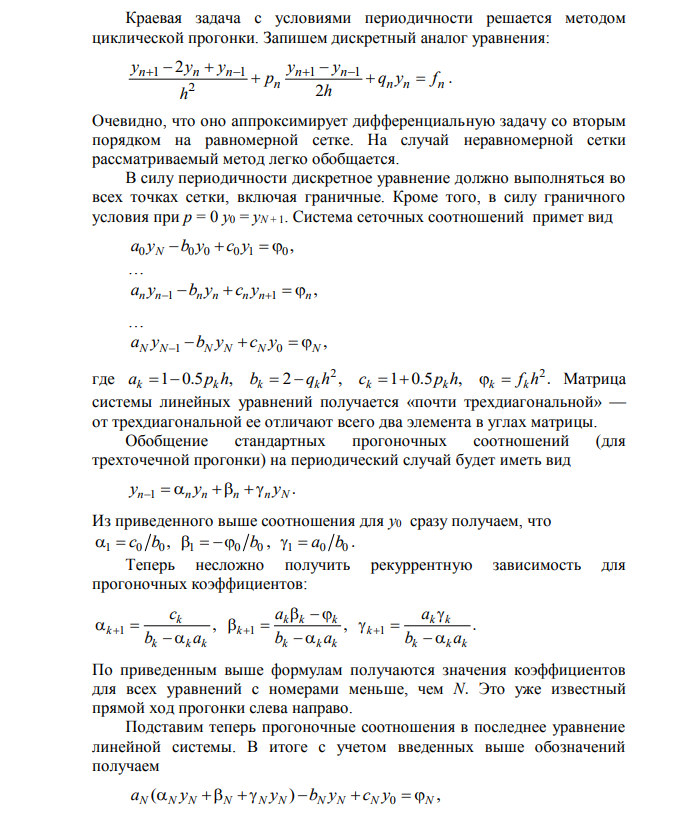

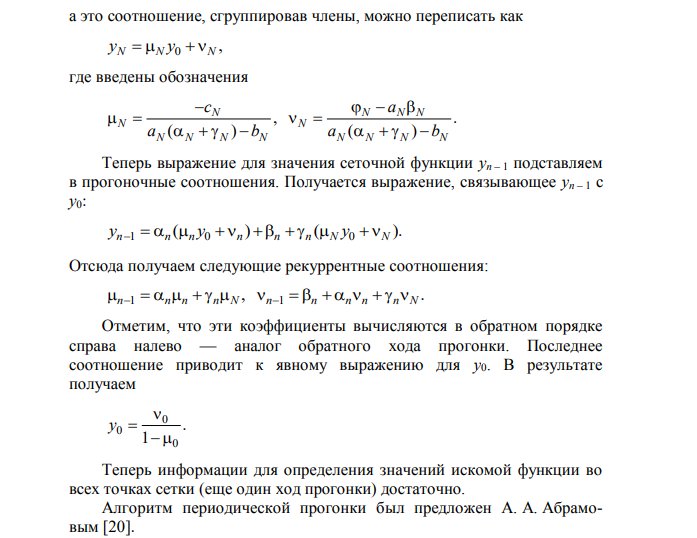

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def p (x):
    return 0
def q (x):
    return -10 - np.sin(2*np.pi*x)
def f (x):
    return np.cos(2*np.pi*x)

In [5]:
def progonka (pk, qk, fk, h):
    h = 0.005
    N = len(fk)
    alpha = np.ndarray(N)
    beta  = np.ndarray(N)
    gamma = np.ndarray(N)
    m = np.ndarray(N)
    v = np.ndarray(N)
    y = np.ndarray(N)

    a = 1 - 1/2 * pk * h
    b = 2 - qk * h**2
    c = 1 + 1/2 * pk * h
    phi = fk * h**2

    # Прогоночные коэффициенты:
    alpha[1] = c[0] / b[0]
    beta [1] = -phi[0] / b[0]
    gamma[1] = a[0] / b[0]

    for k in range(1, N-1):
        alpha[k+1] = c[k] / (b[k] - alpha[k]*a[k])
        beta [k+1] = (a[k]*beta[k] - phi[k]) / (b[k] - alpha[k]/a[k])
        gamma[k+1] = a[k]*gamma[k] / (b[k] - alpha[k]*a[k])
    
    # Вспомогательные коэффициенты:
    m[N-1] = -c[N-1] / (a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])
    v[N-1] = (phi[N-1] - a[N-1]*beta[N-1]) / (a[N-1]*(alpha[N-1] + gamma[N-1]) - b[N-1])

    for n in reversed(range(1, N)):
        m[n-1] = alpha[n]*m[n] + gamma[n]*m[N-1]
        v[n-1] = beta[n] + alpha[n]*v[n] + gamma[n]*v[N-1]

    # Значения сеточной функции:
    y[0] = v[0] / (1 - m[0])
    y[N-1] = m[N-1]*y[0] + v[N-1]

    for n in reversed(range(1, N)):
        y[n-1] = alpha[n]*y[n] + beta[n] + gamma[n]*y[N-1]

    return y

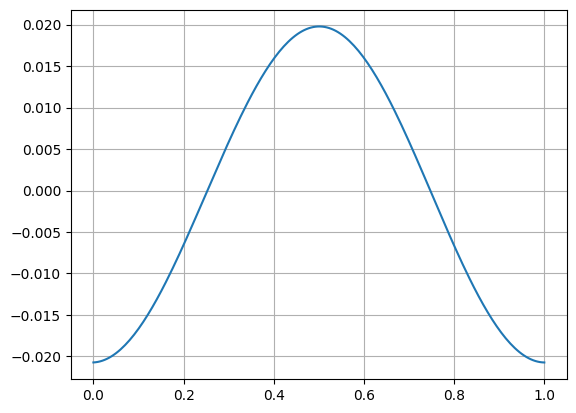

In [6]:
h = 0.005
T = 1.0
N = int(T/h)

xk = np.array(np.linspace(0, 1, N))
pk = np.array([p(x) for x in xk])
qk = np.array([q(x) for x in xk])
fk = np.array([f(x) for x in xk])
yk = progonka(pk, qk, fk, h)

plt.plot (xk, yk)
plt.grid ()